# Recurrent Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset_train = pd.read_csv("data/RNN - LSTM/Google_Stock_Price_Train.csv")
# bütün satırlardaki 1:2 sütunlarını al, yani sınıfı aldık böyle for ile tek tek gezmek yerine
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [3]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled_set = sc.fit_transform(training_set)
print(training_scaled_set[0])

[0.08581368]


<b>Creating a datastructure with 60 timesteps and 1 output</b><br>
Bu ne demek? Belirlenen timestepsler short term memorynin bir veriyi öğrenirken daha önceki verileri bilgi olarak kullandığı için "bir önceki kaç veriye bakarak yeni bilgiyi öğreniyim" sorusunun cevabıdır. Yani burada 60 timesteps yaptığımız için ağa bir önceki 60 veriye dayanarak kendini eğit diyoruz. Eğer bu sayıyı fazla verirsek overfitting olur, az verirsek kötü bir ağ olur. İdeal sayıyı belirleyebilmek lazımdır. 1 outputun sebebi de şu, veri setimizdeki bilgilere baktığımızda verilerde tarih var, zamana göre değişimler gerçekleşiyor ve biz daha önceki değişimlere bakarak gelecek veriler(test verisi) hakkında tahminde bulunacak bir ağ oluşturacağız. Ağa dediğimiz şey ise şu "bir önceki 60 veriye dayanarak 1 sonuç verecek şekilde programlan", buna göre 60 günlük değişim göz önüne alınarak gelecek günlerdeki sonuçlar tahmin edilebilir.<br><br>
Şimdi kodlarla yapacağımız şey ise bunu ağa uygun hale getirmek. Train verimize 60 günlük verileri tek bir veriymiş gibi ekleyeceğiz ve sınıf olarak 61. günün trendini ekleyeceğiz. Bütün verileri böyle eklediğimiz zaman 60 günün sonrasında olabilecek trendi tahmin edebilen bir ağ oluşacaktır. Kıpkısaca stok pricenin Open isimli sütunlarının verilerini aldık ve zamana göre değişimleri bir anlam ifade edecek şekilde 60 günlük Open verilerini sıraya dizip veri olarak alıp 61. gündeki Open verisini tahmin edeceğiz. Ağ 60 günlük değişimlerin 61. güne etkisini tahmin edebilecek.

In [14]:
X_train = []
Y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_scaled_set[i-60 : i, 0])
    Y_train.append(training_scaled_set[i])
    # her bir veri [] liste içinde olduğundan ,0 koymak onları listeden çıkartıp bir veri olarak ekleyecektir
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train[0], Y_train[0])

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656] [0.08627874]


In [15]:
# Reshaping, RNN anlayacağı şekle sokuyoruz
# (X_train, (numOfOpenStockPrice, timesteps, numberOfIndıcators(predictors-features)))
print(X_train.shape[0], X_train.shape[1])
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

1198 60


### Building the RNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
# Initilazing the RNN - stacked LSTM
# continuous, devam eden değerlere göre output tahmin edceğimiz için öylesine regressor dedik
regressor = Sequential()

units = lstm memory üniteleri, yani nöronlar. Bir kaç lstm katmanından oluşan derin bir ağ yapacağız, ancak units sayısını yüksek tutarak bunu daha da derinleştirmemiz mümkün olacaktır. Stock price gibi komplex bir veri için iyi bir derinlik ve çok sayıda nörona ihtiyacımız olacaktır. 50 olarak seçiyoruz ki yüksek derinliğe ulaşabilelim. Eğer sayıyı düşük tutarsak yükselen ve düşen trendleri doğru tahmin etmek çok zorlaşacaktır.<br>
return_sequences default olarak False bir değerdir ve bu lstm katmanından sonra bir lstm katmanı olmayacağı anlamına gelir. Ancak biz birkaç tane lstm katmanı oluşturacağımızdan, kendisinden sonra lstm katmanı gelecek katmanlara bu değeri True olarak veriyoruz.<br>


In [27]:
# adding lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# adding dropout regularization, overfittingi engellemek için
# 0.2 = %20 of the neurons will be ignored during the forward and back propagation
regressor.add(Dropout(0.2))

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

RMSprop genelde rnn de kullanılan iyi sonuç veren bir optimizer ama adam kullanıyoruz.<br>
Başka algoritmalar keras.documentationda bulunabilir TFOptimizer, Nadam felan.<br>
loss fonksiyonu olarak mean_squared_error kullanyoruz çünkü artık sınıflandırma yapmıyoruz regresyon işlemi yapıyoruz crosentropy kullanmak olmaz.

In [29]:
# compiling the rnn
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

Bu sayıda veri için bu epoch sayısı iyi sonuç vermiştir. 25, 50 de denenebilir ancak bunun kadar iyi vermez. Batch size de 32 uygun görüşmüştür, her 32 verilik kümelerle eğitim yapıp loss fonksiyonuna göre back propagation yapılıp ağırlıklar güncelleniyor.

In [30]:
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0471
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015


### Making Predictions and Visualising the Results

In [45]:
# Getting the stockprice of 2017 (20 taneler)
dataset_test = pd.read_csv("data/RNN - LSTM/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

Test set, aslında train setin devamı olan verilerden oluşuyor. Yani test setteki ilk veriyi tahmin edebilmek için, kendisinden önceki 60 veriyi almamız lazım ki ilk test verisinden önceki 60 veri, train setindeki son 60 veridir. Böylece test verisini 20 sıralı bir veri olacak şekilde traindeki verilerle birleştirmemiz gerekiyor. Training_Set'i normalize etmiştik ama test seti normalize etmemiştik, biz şimdi test ve train verilerini birleştirerek test verileri oluşturacağız ve bu yüzden bu test verisini de normalize etmemiz gerekecek ancak bu durumda çıkması gereken sonuçlar da normalize edilmiş olacak bu yüzden normalize edilmiş çıktıları tekrar eski hallerine döndürmemiz gerekecek. Ve tabiki görsellik katıp karşılaştırma yapmak adına orjinal test verisini saklamamız, değiştirmememiz gerekiyor.

In [48]:
# train ve testten genel bir veri oluşturuyoruz "Open" sütun ismi
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)
print(dataset_train["Open"][0], " <-> ", dataset_test["Open"][0], " <-> ", dataset_total[0])
print(len(dataset_train), " <-> ", len(dataset_test), " <-> ", len(dataset_total))

325.25  <->  778.81  <->  0    325.25
0    778.81
Name: Open, dtype: float64
1258  <->  20  <->  1278


In [49]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs[:2])

inputs = inputs.reshape(-1, 1)
print(inputs[:2])

inputs = sc.transform(inputs)
print(inputs[:2])

[779.   779.66]
[[779.  ]
 [779.66]]
[[0.9299055 ]
 [0.93113327]]


In [51]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
predicted_stock_prices = regressor.predict(X_test)
# normalize halde tahmin edilmiş sonuçları tersine çeviriyoruz yani normalize->to->real shape
print(predicted_stock_prices[0:5])
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)
print(predicted_stock_prices[0:5])

[[0.9111153 ]
 [0.9067572 ]
 [0.90572494]
 [0.9072496 ]
 [0.9123984 ]]
[[768.8991 ]
 [766.5564 ]
 [766.0015 ]
 [766.8211 ]
 [769.58887]]


### Visualizing the Results

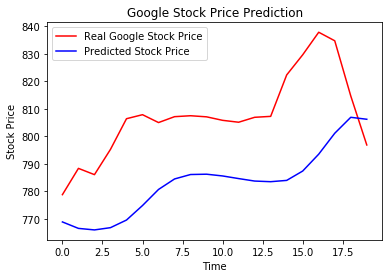

In [57]:
# plotting the real stock prices
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")

# plotting the predicted stock prices
plt.plot(predicted_stock_prices, color = "blue", label = "Predicted Stock Price")

plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend() # sol üstteki renklerin temsil ettiği bilgiler
plt.show()

Görüldüğü gibi yükselen ve düşen trendler yeteri kadar iyi bir şekilde tespit edilebiliyor, sadece bazı dik iniş çıkışlar tam olarak tahmin edilememiş ancak sonuçları yine yakın ve iyi değerlerde.

### Evaluating the RNN

For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.<br>

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

In [60]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_prices))
print(rmse)

27.052722576142806


Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.

<b>here are different ways to improve the RNN model:</b><br>

-Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.<br>
-Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).<br>
-Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.<br>
-Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.<br>
-Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

<b>Tunning the RNN</b><br>
Remember, this time we are dealing with a Regression problem because we predict a continuous outcome (the Google Stock Price).<br>
Parameter Tuning for Regression is the same as Parameter Tuning for Classification which you learned in Part 1 - Artificial Neural Networks, the only difference is that you have to replace:<br>

scoring = 'accuracy'  <br>

by:<br>

scoring = 'neg_mean_squared_error' <br>

in the GridSearchCV class parameters.